## Import Libraries and Read the CSV File

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.special import erf
import math
import scipy.stats

In [2]:
df = pd.read_csv("CO2Concentration.csv")
df.head()

,Date (yyyymmddhhmm),CO2 (ppm)
0,196908201755,323.17
1,196908201755,324.72
2,196908201830,331.02
3,196908201830,-999.99
4,196908271915,-999.99


In [3]:
# Check the datatypes
df.dtypes

Date (yyyymmddhhmm)      int64
CO2 (ppm)              float64
dtype: object

In [4]:
# Convert object(Date) to datetime
def convert_datetime(dt):
    return datetime.strptime(str(int(dt)), "%Y%m%d%H%M")

In [5]:
df['Date'] = df['Date (yyyymmddhhmm)'].apply(convert_datetime)
df.head()

,Date (yyyymmddhhmm),CO2 (ppm),Date
0,196908201755,323.17,1969-08-20 17:55:00
1,196908201755,324.72,1969-08-20 17:55:00
2,196908201830,331.02,1969-08-20 18:30:00
3,196908201830,-999.99,1969-08-20 18:30:00
4,196908271915,-999.99,1969-08-27 19:15:00


In [6]:
df.Date.dt.year.unique()

array([1969, 1970, 1971, 1974, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019], dtype=int64)

In [7]:
is_1971 = df.Date.dt.year == 1971
is_1986 = df.Date.dt.year == 1986
is_2002 = df.Date.dt.year == 2002
is_2019 = df.Date.dt.year == 2019

In [8]:
df_1971 = df[is_1971]
df_1986 = df[is_1986]
df_2002 = df[is_2002]
df_2019 = df[is_2019]

## Checkout the Data of the year 1971

In [9]:
df_1971

,Date (yyyymmddhhmm),CO2 (ppm),Date
121,197108032030,326.49,1971-08-03 20:30:00
122,197108032030,325.91,1971-08-03 20:30:00
123,197108032230,325.37,1971-08-03 22:30:00
124,197108032230,325.99,1971-08-03 22:30:00
125,197108040030,325.42,1971-08-04 00:30:00
126,197108040030,325.09,1971-08-04 00:30:00
127,197108040220,325.57,1971-08-04 02:20:00
128,197108040220,325.48,1971-08-04 02:20:00
129,197108040430,325.34,1971-08-04 04:30:00
130,197108040430,325.41,1971-08-04 04:30:00


In [10]:
min_1971 = df_1971['CO2 (ppm)'].min()
max_1971 = df_1971['CO2 (ppm)'].max()
mean_1971 = df_1971['CO2 (ppm)'].mean()
std_1971 = df_1971['CO2 (ppm)'].std()
print(min_1971, max_1971, mean_1971, std_1971)

324.81 328.0 325.56125 0.6968208084797965


## To draw histogram

In [28]:
def draw_histogram(df: pd.DataFrame, column_name: str, x_steps: int, year:int):
    # exclude outliers based on the 6 sigma rule
    std_temp = df[column_name].std()
    mean_temp = df[column_name].mean()
    lower_limit = df[column_name] > mean_temp - 3 * std_temp
    upper_limit = df[column_name] < mean_temp + 3 * std_temp
    df = df[lower_limit & upper_limit]
    
    # calculate statistics of the new dataframe
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    std_val = df[column_name].std()
    mean_val = df[column_name].mean()
    
    # print the values
    print("Mean:", round(mean_temp, 5))
    print("Std.:", round(std_temp, 5))
    print("Mean (After excluding outliers):", round(mean_val, 5))
    print("Std. (After excluding outliers):", round(std_val, 5))
    
    # Draw histogram
    x_list = []
    step = (max_val - min_val) / x_steps
    for i in range(0, x_steps + 5):
        x_list.append(min_val + (i - 5) * step)
    
    # Probability Density Function 1: normal distribution graph
    x = np.linspace(min_val - 5 * step, max_val + 5 * step, 1000)
    y = (1 / (np.sqrt(2 * np.pi) * std_val)) * np.exp(-(x-mean_val)**2 / (2 * std_val**2))
    
    # Probability Density Function 2: Maximum Likelihood Estimation
    x_fit = df[column_name]
    loc, scale = scipy.stats.norm.fit(x_fit)
    y_fit = (1 / (np.sqrt(2 * np.pi) * scale)) * np.exp(-(x-loc)**2 / (2 * scale**2))
    
#     # get Maximum Likelihood Estimation value
#     estimator = MLE(df[column_name], mean_val, std_val, learning_rate=0.1, epochs=1000, verbose=True)
#     estimator.fit()
#     result = estimator.get_mle()
#     print("Result MLE:", result)
#     y_mle = (1 / (np.sqrt(2 * np.pi) * std_val)) * np.exp(-(x-result)**2 / (2 * std_val**2))
    
    norm_label = "PDF1 N(" + str(round(mean_temp, 2)) + ", " + str(round(std_val, 2)) + ")"
    fit_label = "PDF2 N(" + str(round(loc, 2)) + ", " + str(round(scale, 2)) + ")"
    title = "CO2 emission of the year " + str(year)
    plt.hist(df[column_name], x_list, density = True, label = 'Histogram')
    plt.plot(x, y, alpha=0.7, label=norm_label, linewidth = 4)
    plt.plot(x, y_fit, alpha=0.7, label=fit_label, color = 'black')
    plt.title(title)
    plt.xlabel('CO2 (ppm)')
    plt.ylabel('Number of Data or f(x)')
    plt.legend(loc = 'upper left')
    plt.show()
    return df

Mean: 325.56125
Std.: 0.69682
Mean (After excluding outliers): 325.45522
Std. (After excluding outliers): 0.47491


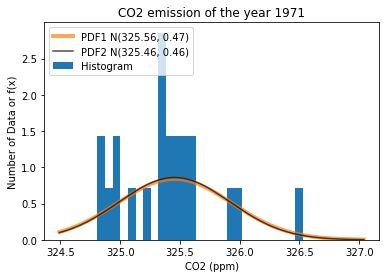

In [30]:
df_1971_prcd = draw_histogram(df_1971, 'CO2 (ppm)', 30, 1971)

Mean: 342.92216
Std.: 73.29121
Mean (After excluding outliers): 346.90706
Std. (After excluding outliers): 2.08816


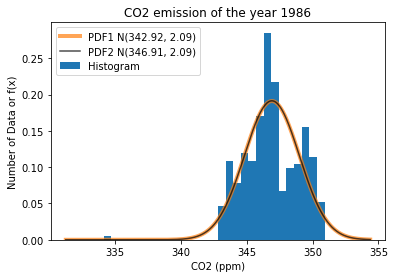

,Date (yyyymmddhhmm),CO2 (ppm),Date
2162,198601032038,346.210,1986-01-03 20:38:00
2163,198601032038,346.460,1986-01-03 20:38:00
2164,198601032040,346.380,1986-01-03 20:40:00
2165,198601032040,346.200,1986-01-03 20:40:00
2166,198601032042,346.327,1986-01-03 20:42:00
...,...,...,...
2495,198612312020,334.150,1986-12-31 20:20:00
2496,198612312045,347.320,1986-12-31 20:45:00
2497,198612312045,347.230,1986-12-31 20:45:00
2498,198612312047,346.930,1986-12-31 20:47:00


In [31]:
draw_histogram(df_1986, 'CO2 (ppm)', 30, 1986)

Mean: 373.32936
Std.: 1.86549
Mean (After excluding outliers): 373.32936
Std. (After excluding outliers): 1.86549


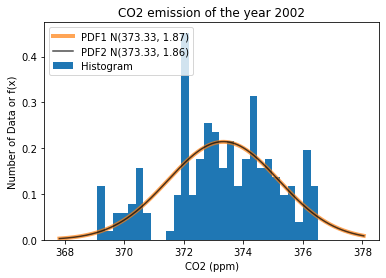

In [32]:
df_2002_prcd = draw_histogram(df_2002, 'CO2 (ppm)', 30, 2002)

Mean: 412.04783
Std.: 4.8127
Mean (After excluding outliers): 411.74919
Std. (After excluding outliers): 2.06773


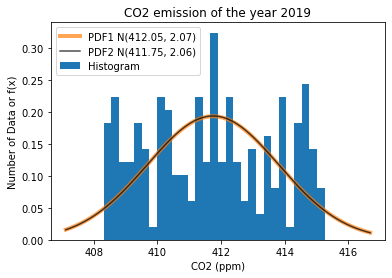

In [33]:
df_2019_prcd = draw_histogram(df_2019, 'CO2 (ppm)', 30, 2019)

In [34]:
def draw_histogram_1986(df: pd.DataFrame, column_name: str, x_steps: int, year:int):
    # exclude outliers based on the 6 sigma rule
    std_temp = df[column_name].std()
    mean_temp = df[column_name].mean()
    lower_limit = df[column_name] > 334.15
    upper_limit = df[column_name] < mean_temp + 3 * std_temp
    df = df[lower_limit & upper_limit]
    
    # calculate statistics of the new dataframe
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    std_val = df[column_name].std()
    mean_val = df[column_name].mean()
    
    # print the values
    print("Mean:", round(mean_temp, 5))
    print("Std.:", round(std_temp, 5))
    print("Mean (After excluding outliers):", round(mean_val, 5))
    print("Std. (After excluding outliers):", round(std_val, 5))
    
    # Draw histogram
    x_list = []
    step = (max_val - min_val) / x_steps
    for i in range(0, x_steps + 5):
        x_list.append(min_val + (i - 5) * step)
    
    # Probability Density Function 1: normal distribution graph
    x = np.linspace(min_val - 5 * step, max_val + 5 * step, 1000)
    y = (1 / (np.sqrt(2 * np.pi) * std_val)) * np.exp(-(x-mean_val)**2 / (2 * std_val**2))
    
    # Probability Density Function 2: Maximum Likelihood Estimation
    x_fit = df[column_name]
    loc, scale = scipy.stats.norm.fit(x_fit)
    y_fit = (1 / (np.sqrt(2 * np.pi) * scale)) * np.exp(-(x-loc)**2 / (2 * scale**2))
    
#     # get Maximum Likelihood Estimation value
#     estimator = MLE(df[column_name], mean_val, std_val, learning_rate=0.1, epochs=1000, verbose=True)
#     estimator.fit()
#     result = estimator.get_mle()
#     print("Result MLE:", result)
#     y_mle = (1 / (np.sqrt(2 * np.pi) * std_val)) * np.exp(-(x-result)**2 / (2 * std_val**2))
    
    norm_label = "PDF1 N(" + str(round(mean_temp, 2)) + ", " + str(round(std_val, 2)) + ")"
    fit_label = "PDF2 N(" + str(round(loc, 2)) + ", " + str(round(scale, 2)) + ")"
    title = "CO2 emission of the year " + str(year)
    plt.hist(df[column_name], x_list, density = True, label = 'Histogram')
    plt.plot(x, y, alpha=0.7, label=norm_label, linewidth = 4)
    plt.plot(x, y_fit, alpha=0.7, label=fit_label, color = 'black')
    plt.title(title)
    plt.xlabel('CO2 (ppm)')
    plt.ylabel('Number of Data or f(x)')
    plt.legend(loc = 'upper left')
    plt.show()
    return df

Mean: 342.92216
Std.: 73.29121
Mean (After excluding outliers): 346.94503
Std. (After excluding outliers): 1.97134


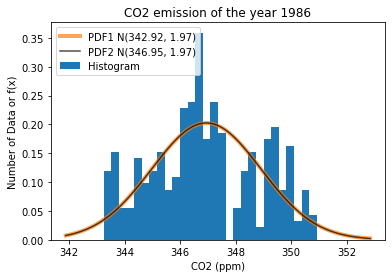

In [36]:
df_1986_prcd = draw_histogram_1986(df_1986, 'CO2 (ppm)', 30, 1986)

In [ ]:
# # https://yamalab.tistory.com/94

# import math
# import scipy.stats

# class MLE():
#     def __init__(self, samples, m, std, learning_rate, epochs, verbose=False):
#         """
#         :param samples: samples for get Maximum Likelihood Estimator
#         :param learning_rate: alpha on weight update
#         :param epochs: training epochs
#         :param verbose: print status
#         """
#         self._samples = samples
#         self._m = m
#         self._std = std
#         self._learning_rate = learning_rate
#         self._epochs = epochs
#         self._verbose = verbose
#         self._pdf = scipy.stats.norm(m, std)

#     def likelihood(self, x, M):
#         """
#         Let the shape of the Probability Density Function is Normal distribution.
#         PDF's y is same as likelihood

#         [inputs]
#           x: x value to get the likelihood
#           return: likelihood of input x
#         """
#         return self._pdf.pdf(x)
#         # return (1 / math.sqrt(2*math.pi) * math.pow(self._std, 2)) * np.exp(-(np.power(x - M, 2) / (2*math.pow(self._std, 2))))


#     def fit(self):
#         """
#         training estimator
#         M, which minimizes Likelihood, is obtained by the gradient descent method.
#         M is the MLE of the samples
#         """

#         # init M
#         self._estimator = np.random.normal(self._m, self._std, 1)

#         # train while epochs
#         self._training_process = []
#         for epoch in range(self._epochs):
#             likelihood = np.prod(self.likelihood(self._samples, self._m))
#             prediction = np.prod(self.likelihood(self._samples, self._estimator))
#             cost = self.cost(likelihood, prediction)
#             self._training_process.append((epoch, cost))
#             self.update(self._samples, self._estimator)

#             # print status
#             if self._verbose == True and ((epoch + 1) % 10 == 0):
#                 print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


#     def cost(self, likelihood, prediction):
#         """
#         cost function
#         :param likelihood: likelihood of population
#         :param prediction: likelihood in samples
#         :return: the cost of optimizing the parameters
#         """
#         return math.sqrt(likelihood - prediction)


#     def update(self, x, M):
#         """
#         update in gradient descent
#         gradient is approximated
#         :param x: samples
#         :param M: estimator
#         """
#         gradient = np.sum(np.exp(-(np.power(x - M, 2) / (2*math.pow(self._std, 2)))))
#         if self._m > self._estimator:
#             self._estimator += self._learning_rate * gradient
#         else:
#             self._estimator -= self._learning_rate * gradient


#     def get_mle(self):
#         """
#         parameter getter
#         :return: estimator of MLE
#         """
#         return self._estimator


# # # run example
# # if __name__ == "__main__":

# #     # samples for MLE
# #     samples = df_1986_prcd['CO2 (ppm)']

# #     # assumptions about the population
# #     mean = df_1986_prcd['CO2 (ppm)'].mean()
# #     std = df_1986_prcd['CO2 (ppm)'].std()

# #     # get MLE
# #     estimator = MLE(samples, mean, std, learning_rate=0.1, epochs=100, verbose=True)
# #     estimator.fit()
# #     result = estimator.get_mle()
# #     print(result)